In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
from sys import maxsize #para imprimir arrays completos
import numpy as np
import pandas as pd

from sklearn import preprocessing #para normalizar datos
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Para importar notebooks propias

In [3]:
import io, os, sys, types
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

In [4]:
def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path

    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path

In [5]:
class NotebookLoader(object):
    """Module Loader for Jupyter Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path

    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)

        print ("importing Jupyter notebook from %s" % path)

        # load the notebook object
        with io.open(path, 'r', encoding='utf-8') as f:
            nb = read(f, 4)


        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod

        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__

        try:
          for cell in nb.cells:
            if cell.cell_type == 'code':
                # transform the input to executable Python
                code = self.shell.input_transformer_manager.transform_cell(cell.source)
                # run the code in themodule
                exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod

In [6]:
class NotebookFinder(object):
    """Module finder that locates Jupyter Notebooks"""
    def __init__(self):
        self.loaders = {}

    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return

        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)

        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]

In [7]:
sys.meta_path.append(NotebookFinder())

# Importamos bibliotecas propias

In [8]:
#luego de ejecutar las celdas anteriores, se puede importar la biblioteca propia
#si da errores, probar con hacer restart del kernel
import _02_Anexo_Func as funcs

importing Jupyter notebook from _02_Anexo_Func.ipynb


# Levantamos el Dataframe

In [9]:
pathArchivoDataSet = 'mushrooms.csv' 
mushrooms = pd.read_csv(pathArchivoDataSet)

In [10]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

##### Comprobamos que el data frame no tiene valores nulos

In [11]:
mushrooms.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

##### Vemos que todos los valores del dataframe están codificados, usando la referencia del mismo armamos un método para modificar cada código con la palabra correspondiente (en le notebook de funciones auxiliares). Por ejemplo, para la columna 'class' la 'e' es por 'edible' y la 'p' por 'poisonous'

In [12]:
mushrooms.sample(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2433,e,x,f,g,t,n,f,c,b,n,...,s,p,w,p,w,o,p,n,y,d
5960,p,x,y,n,f,f,f,c,n,b,...,k,w,p,p,w,o,e,w,v,d
502,e,x,s,w,t,l,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
5496,p,f,y,y,f,f,f,c,b,h,...,k,p,b,p,w,o,l,h,v,g
4890,p,f,y,g,f,f,f,c,b,h,...,k,n,p,p,w,o,l,h,y,g
7408,p,k,y,e,f,y,f,c,n,b,...,s,p,w,p,w,o,e,w,v,l
1140,e,f,f,w,f,n,f,w,b,n,...,s,w,w,p,w,o,e,n,a,g
362,e,f,s,n,f,n,f,w,b,k,...,s,w,w,p,w,o,e,k,a,g
7742,p,k,s,n,f,s,f,c,n,b,...,s,p,w,p,w,o,e,w,v,p
3387,e,f,f,e,t,n,f,c,b,n,...,s,g,w,p,w,o,p,n,v,d


In [13]:
mushrooms.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

##### Modificamos todos los valores que contiene el dataframe, para hacerlos mas compresibles y legibles

In [14]:
funcs.getDescriptForEachColumns(mushrooms)

Este dataframe contiene por cada fila información acerca de  un hongo en particular. Vamos a generar un modelo para clasificar dichos hongos en si son comestibles o no.
La columna que dice si un hongo es comestible, o no, o sea nuestro target para el data set, es la primera ("edible"). Si vale 1 significa que sí es comestible.

In [15]:
mushrooms.head()

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,convex,smooth,brown,1,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,1,convex,smooth,yellow,1,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,1,bell,smooth,white,1,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,0,convex,scaly,white,1,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,1,convex,smooth,gray,0,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


##### Mostramos informacíón básica de todas las columnas del data frame

In [16]:
funcs.getInfoByColumn(mushrooms)

Información columna: edible 
---------------
count    8124.000000
mean        0.517971
std         0.499708
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: edible, dtype: float64
Show Unique  0 1

Información columna: cap-shape 
---------------
count       8124
unique         6
top       convex
freq        3656
Name: cap-shape, dtype: object
Show Unique  'convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical'

Información columna: cap-surface 
---------------
count      8124
unique        4
top       scaly
freq       3244
Name: cap-surface, dtype: object
Show Unique  'smooth' 'scaly' 'fibrous' 'grooves'

Información columna: cap-color 
---------------
count      8124
unique       10
top       brown
freq       2284
Name: cap-color, dtype: object
Show Unique  'brown' 'yellow' 'white' 'gray' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green',etc...

Información columna: bruises 
---------------
count    8124.000000
mean        0.415

###### Para obtener un poco más de información, imprimimos un histograma de todas las columnas

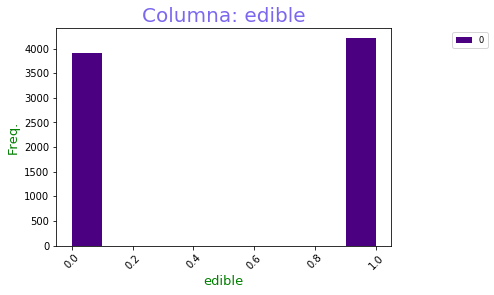

AxesSubplot(0.125,0.125;0.775x0.755)


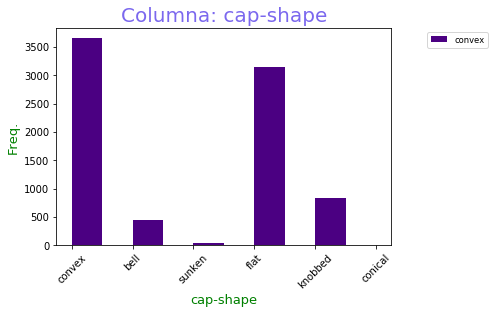

AxesSubplot(0.125,0.125;0.775x0.755)


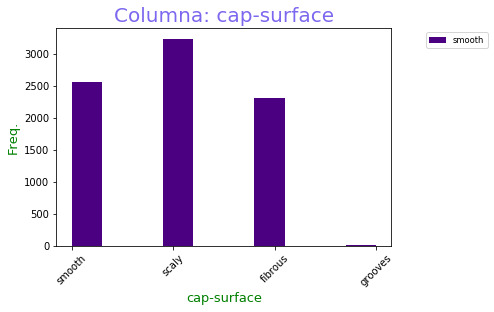

AxesSubplot(0.125,0.125;0.775x0.755)


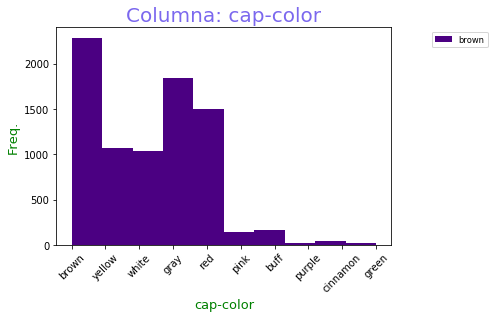

AxesSubplot(0.125,0.125;0.775x0.755)


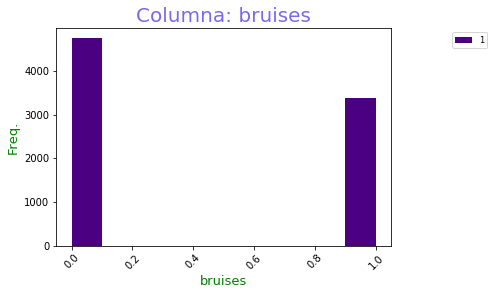

AxesSubplot(0.125,0.125;0.775x0.755)


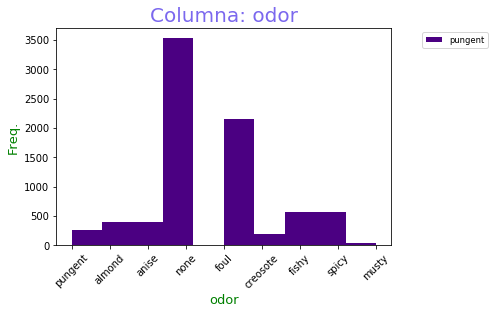

AxesSubplot(0.125,0.125;0.775x0.755)


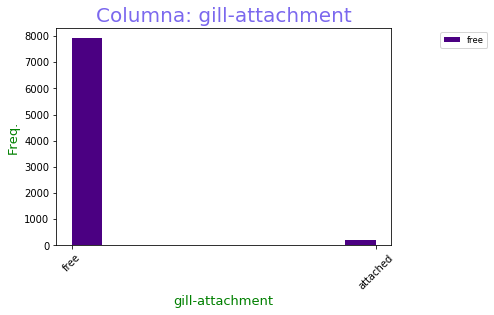

AxesSubplot(0.125,0.125;0.775x0.755)


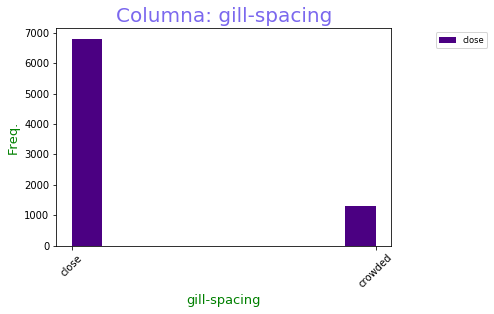

AxesSubplot(0.125,0.125;0.775x0.755)


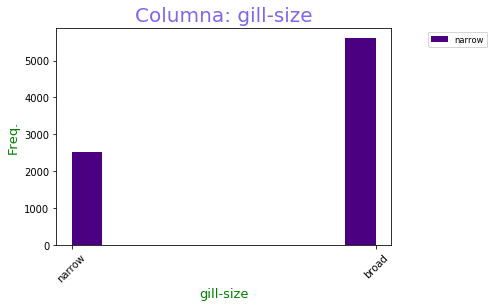

AxesSubplot(0.125,0.125;0.775x0.755)


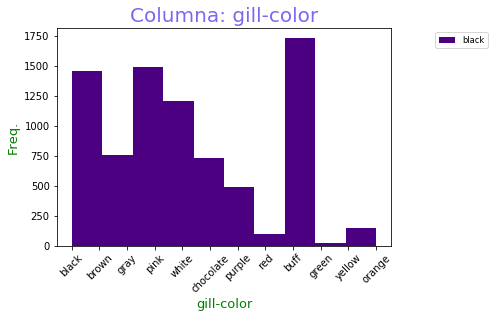

AxesSubplot(0.125,0.125;0.775x0.755)


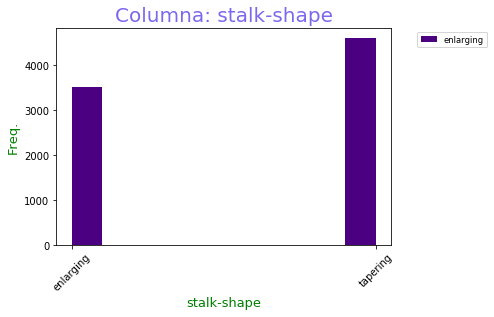

AxesSubplot(0.125,0.125;0.775x0.755)


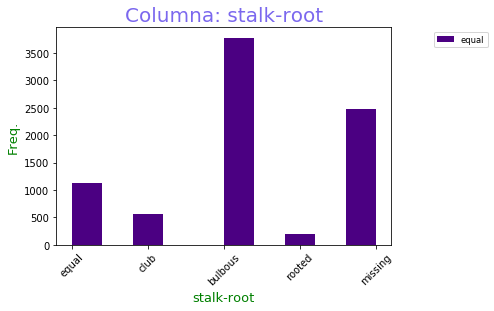

AxesSubplot(0.125,0.125;0.775x0.755)


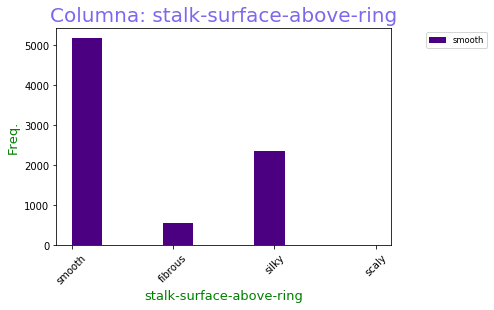

AxesSubplot(0.125,0.125;0.775x0.755)


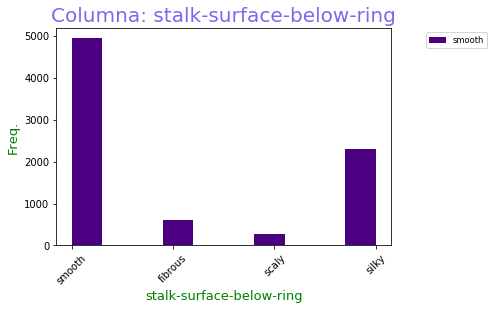

AxesSubplot(0.125,0.125;0.775x0.755)


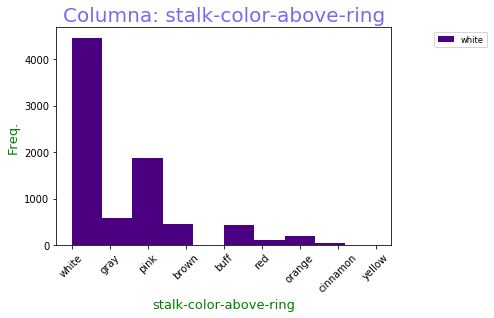

AxesSubplot(0.125,0.125;0.775x0.755)


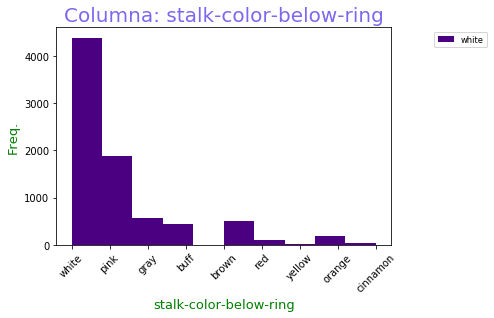

AxesSubplot(0.125,0.125;0.775x0.755)


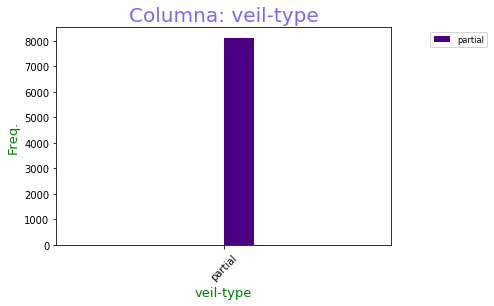

AxesSubplot(0.125,0.125;0.775x0.755)


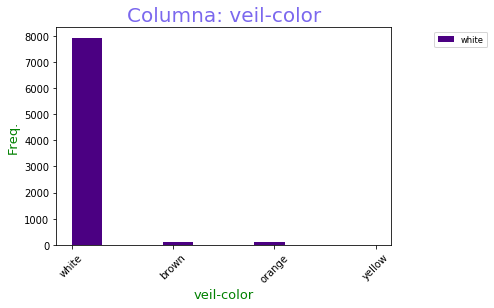

AxesSubplot(0.125,0.125;0.775x0.755)


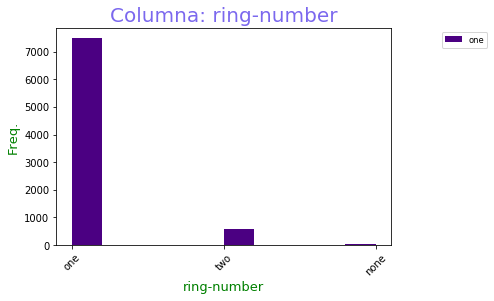

AxesSubplot(0.125,0.125;0.775x0.755)


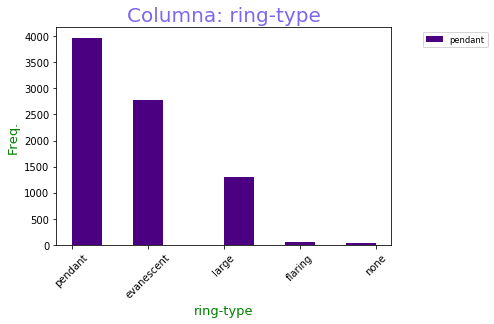

AxesSubplot(0.125,0.125;0.775x0.755)


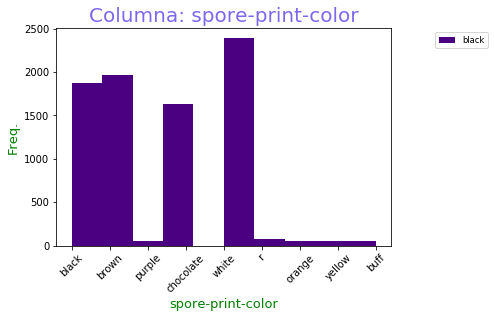

AxesSubplot(0.125,0.125;0.775x0.755)


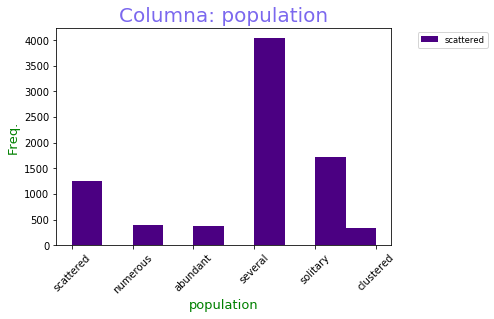

AxesSubplot(0.125,0.125;0.775x0.755)


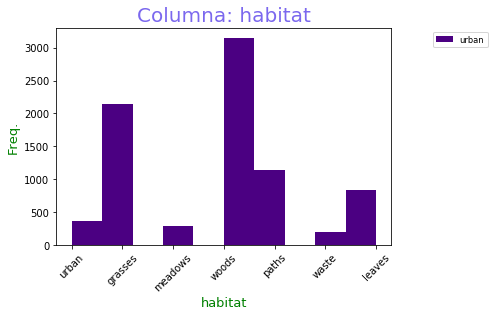

AxesSubplot(0.125,0.125;0.775x0.755)


In [17]:
funcs.getHistogramByColumn(mushrooms)

# Generación de dummies para variables categóricas

In [18]:
# Selección de columnas para Dummies
mushroomsdummies = pd.get_dummies(mushrooms, drop_first=True, columns=mushrooms.columns)
mushroomsdummies

,edible_1,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,cap-color_buff,...,population_numerous,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
8120,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
8121,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
8122,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


# Columnas luego de hacer Dummies
mushroomsdummies.columns

##### Mostramos información estadística para el data set, luego de generar los dummies

In [19]:
funcs.getStatisticForEachColumn(mushroomsdummies)

Statistics mesures from:edible_1
-----------------------------
STD:0.49970767884413053
VAR: 0.2497077642957887
Mean: 0.517971442639094

Statistics mesures from:cap-shape_conical
-----------------------------
STD:0.022185275504213193
VAR: 0.0004921864491978419
Mean: 0.0004923682914820286

Statistics mesures from:cap-shape_convex
-----------------------------
STD:0.49752681392757064
VAR: 0.2475329305769195
Mean: 0.4500246184145741

Statistics mesures from:cap-shape_flat
-----------------------------
STD:0.4873213968679901
VAR: 0.23748214384536911
Mean: 0.3879862136878385

Statistics mesures from:cap-shape_knobbed
-----------------------------
STD:0.30256201029582624
VAR: 0.09154377007425166
Mean: 0.1019202363367799

Statistics mesures from:cap-shape_sunken
-----------------------------
STD:0.06264115289778346
VAR: 0.003923914036363486
Mean: 0.003938946331856229

Statistics mesures from:cap-surface_grooves
-----------------------------
STD:0.02218527550421319
VAR: 0.0004921864491978418
Me

##### Verificamos la correlación entre las datos

In [20]:
mushroomsdummies.head()

,edible_1,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,cap-color_buff,...,population_numerous,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Análisis de modelos usando Pipelines y GridSearch

In [21]:
#importamos las bibliotecas necesarias
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFECV #feature selection
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

from sklearn.neighbors import KNeighborsClassifier

##### Hacemos un split del data frame de dummies

In [22]:
X = mushroomsdummies.drop(['edible_1'],axis=1)
y = mushroomsdummies['edible_1']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25,random_state=12)

##### Definimos el feature selector

In [24]:
kf = KFold(n_splits=5, shuffle = True, random_state=42)
estimator = linear_model.LogisticRegression()
selector = RFECV(estimator, step = 1, cv=kf, scoring = 'roc_auc', verbose=2)

##### Definimos un grid search, para optimizar el feature selector con el hiperparámetro C de la regresión logística

In [25]:
grid_hiperparametros = {"estimator__C": np.linspace(0.0001, 5, 20)}

In [26]:
#usamos el mismo cross validation definido para el feature selector, n_jobs = -1 para que use todos los disponbles
#número aproximado de iteraciones: 5 (kFold del selector) * 20 (selección del hiperp. C) * 5 (cross validation del grid)
grid = RandomizedSearchCV(estimator=selector, param_distributions=grid_hiperparametros, cv=kf, n_jobs= -1)
grid.fit(X_train, y_train)

Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 fe

Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 fe

Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 fe

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=RFECV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                                   estimator=LogisticRegression(C=1.0,
                                                                class_weight=None,
                                                                dual=False,
                                                                fit_intercept=True,
                                                                intercept_scaling=1,
                                                                l1_ratio=None,
                                                                max_iter=100,
                                                                multi_class='warn',
                                                                n_jobs=None,
                                                                penalty

##### Mejor estimador resultante para la selección de features

In [27]:
grid.best_estimator_

RFECV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
      estimator=LogisticRegression(C=2.894778947368421, class_weight=None,
                                   dual=False, fit_intercept=True,
                                   intercept_scaling=1, l1_ratio=None,
                                   max_iter=100, multi_class='warn',
                                   n_jobs=None, penalty='l2', random_state=None,
                                   solver='warn', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='roc_auc', step=1,
      verbose=2)

##### El mejor hiperparámetro C seleccionado

In [28]:
grid.best_params_

{'estimator__C': 2.894778947368421}

##### Puntaje de la mejor selección

In [29]:
grid.best_score_

1.0

### Analizamos cómo resultó el feature selection

In [30]:
print("Número óptimo de features : %d" % grid.best_estimator_.n_features_)

Número óptimo de features : 12


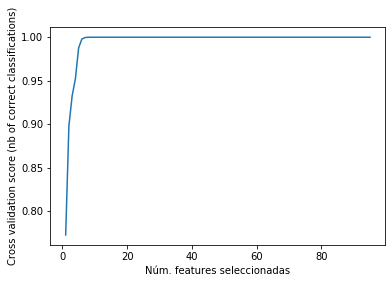

In [31]:
#Grafico que muestra el score del cross validation, dependiendo de la cantidad de features seleccionadas
plt.figure()
plt.xlabel("Núm. features seleccionadas")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(grid.best_estimator_.grid_scores_) + 1), grid.best_estimator_.grid_scores_)
plt.show()

### Tomamos las features seleccionadas para generar un nuevo data frame para análisis

In [32]:
array_features_selected = grid.best_estimator_.support_

In [33]:
#tenemos todas las features que fueron seleccionadas, en este array no está la variable objetivo
array_features_selected

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False,  True,  True, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False])

In [34]:
#agregamos un nuevo elemento al array en la primera posición para asegurarnos que se seleccione también la variable objetivo
array_features_selected = np.insert(array_features_selected, 0, True, axis=0)


In [35]:
array_features_selected

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False,  True,  True, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False])

In [36]:
mushroomsdummies_features_selected = mushroomsdummies.loc[:,array_features_selected]

##### Luego de aplicar Feature Selection, nuestro dataframe que tenía 95 columnas dummies pasa a tener muchas menos

In [37]:
mushroomsdummies_features_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   edible_1                        8124 non-null   uint8
 1   odor_creosote                   8124 non-null   uint8
 2   odor_foul                       8124 non-null   uint8
 3   odor_none                       8124 non-null   uint8
 4   odor_pungent                    8124 non-null   uint8
 5   gill-size_narrow                8124 non-null   uint8
 6   gill-color_buff                 8124 non-null   uint8
 7   stalk-surface-above-ring_silky  8124 non-null   uint8
 8   ring-type_flaring               8124 non-null   uint8
 9   spore-print-color_chocolate     8124 non-null   uint8
 10  spore-print-color_r             8124 non-null   uint8
 11  population_clustered            8124 non-null   uint8
 12  habitat_waste                   8124 non-null   uint8
dtypes: 

In [38]:
mushroomsdummies_features_selected.shape

(8124, 13)

In [39]:
mushroomsdummies_features_selected.head()

,edible_1,odor_creosote,odor_foul,odor_none,odor_pungent,gill-size_narrow,gill-color_buff,stalk-surface-above-ring_silky,ring-type_flaring,spore-print-color_chocolate,spore-print-color_r,population_clustered,habitat_waste
0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0


##### Las columnas seleccionadas por el método de feature selection son las siguientes:

In [40]:
mushroomsdummies_features_selected.drop('edible_1', axis=1).columns

Index(['odor_creosote', 'odor_foul', 'odor_none', 'odor_pungent',
       'gill-size_narrow', 'gill-color_buff', 'stalk-surface-above-ring_silky',
       'ring-type_flaring', 'spore-print-color_chocolate',
       'spore-print-color_r', 'population_clustered', 'habitat_waste'],
      dtype='object')

##### Con el data frame reducido, generamos nuevamente el train_test_split para utilizarlo en los modelos

In [41]:
X = mushroomsdummies_features_selected.drop(['edible_1'],axis=1)

In [42]:
y = mushroomsdummies_features_selected['edible_1']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25,random_state=12)

### Analizamos modelos con pipelines

##### Reutilizamos el Kfold definido mas arriba: kf = KFold(n_splits=5, shuffle = True, random_state=42)

## KNN

In [44]:
knn_pasos = [('preprocesamiento', MinMaxScaler()), 
             ('clasificador', KNeighborsClassifier(n_neighbors=2))]

knn_pipe_grid=Pipeline(knn_pasos)

##### Definimos hiperparámetros para el modelo KNN

In [45]:
knn_new_param_grid = [{'preprocesamiento':[MinMaxScaler(), StandardScaler(), None],
                       'clasificador__n_neighbors':range(2,15,1), 
                       'clasificador__weights':['uniform','distance']}]

In [46]:
knn_grid=GridSearchCV(knn_pipe_grid, knn_new_param_grid, cv=kf)
knn_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocesamiento',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('clasificador',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=2, p=2,
                                                             weights='uniform'))],
                                

##### Veamos los mejores parámetros que resultaron para el Grid

In [47]:
knn_grid.best_params_

{'clasificador__n_neighbors': 2,
 'clasificador__weights': 'uniform',
 'preprocesamiento': MinMaxScaler(copy=True, feature_range=(0, 1))}

In [48]:
print('KNN score: ' + str(knn_grid.score(X_test, y_test)))

KNN score: 1.0


In [49]:
knn_predicciones = knn_grid.predict(X_test)

array([ 979,    0,    0, 1052], dtype=int64)

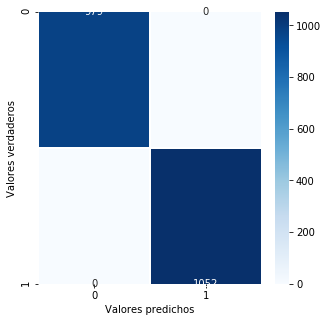

In [50]:
funcs.getConfusionMatrix(y_test, knn_predicciones)

## Regresión Logística

In [51]:
reg_log_pasos = [('preprocesamiento', MinMaxScaler()), 
             ('clasificador', linear_model.LogisticRegression())]

reg_log_pipe_grid=Pipeline(reg_log_pasos)

##### Definimos hiperparámetros para el modelo

In [52]:
#se dejan afuera los siguientes valores para penalty: 'none'y 'elasticnet' debido a que aplican reestricciones para otro 
#parámetro de la reg. Este parámetro es solver, el cuál puede tomar valores que sólo funcionan con un tipo de valor de penalty:
#ejemplo: ‘liblinear’ does not support setting penalty='none'
reg_log_new_param_grid = [{'preprocesamiento':[MinMaxScaler(), StandardScaler(), None],
                           'clasificador__C':np.linspace(0.0001, 5, 20), 
                           'clasificador__penalty':['l1', 'l2']}]

In [53]:
reg_log_grid=GridSearchCV(reg_log_pipe_grid, reg_log_new_param_grid, cv=kf)
reg_log_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocesamiento',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('clasificador',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_

##### Veamos los mejores parámetros que resultaron para el Grid

In [54]:
reg_log_grid.best_params_

{'clasificador__C': 0.26325263157894735,
 'clasificador__penalty': 'l1',
 'preprocesamiento': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [55]:
print('Regresión Logística score: ' + str(reg_log_grid.score(X_test, y_test)))

Regresión Logística score: 1.0


In [56]:
reg_log_predicciones = reg_log_grid.predict(X_test)

array([ 979,    0,    0, 1052], dtype=int64)

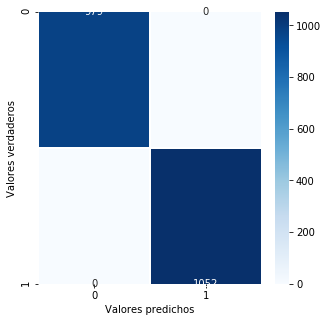

In [57]:
funcs.getConfusionMatrix(y_test, reg_log_predicciones)

##### Aporte de cada uno de los coeficientes al modelo

In [64]:
lr_coeficientes = reg_log_grid.best_estimator_.steps[1][1].coef_

In [67]:
lr_coeficientes

array([[-1.30223192, -3.10514034,  0.50808963, -1.50158   , -2.67942111,
        -3.43979916, -2.64993897,  0.53621682, -2.52267807, -1.36590208,
        -1.17483346,  0.2600083 ]])

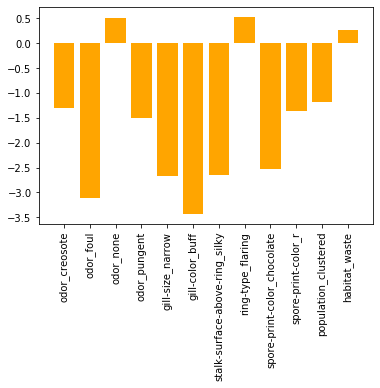

In [66]:
#graficamos el peso de cada uno de los coeficientes del modelo
plt.bar([x for x in range(len(lr_coeficientes[0]))], lr_coeficientes[0],color='orange', linewidth=0.8)
plt.xticks(range(0,len(lr_coeficientes[0])), X_train.columns, rotation=90)
plt.show()

## Multinomial Bernouilli Bayes

In [68]:
bnb_pasos = [('preprocesamiento', MinMaxScaler()), 
             ('clasificador', BernoulliNB())]

bnb_pipe_grid=Pipeline(bnb_pasos)

##### Definimos hiperparámetros para el modelo

In [69]:
bnb_new_param_grid = [{'preprocesamiento':[None, MinMaxScaler(), StandardScaler()],
                           'clasificador__alpha':np.linspace(0.0001, 10, 40)}]

In [70]:
bnb_grid=GridSearchCV(bnb_pipe_grid, bnb_new_param_grid, cv=kf)
bnb_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocesamiento',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('clasificador',
                                        BernoulliNB(alpha=1.0, binarize=0.0,
                                                    class_prior=None,
                                                    fit_prior=True))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'clasificador__...
       7.17951538e+00, 7.43592308e+00, 7.69233077e+00, 7.94873846e+00,
       8.20514615e+00, 8.46155385e+00, 8.71796154e+00, 8.97436923e+00,
       9.23077692e+00, 9.48718462e+00, 9.74359231e+00, 1.00000000e+01]),
                      

##### Veamos los mejores parámetros que resultaron para el Grid

In [71]:
result = pd.DataFrame(bnb_grid.cv_results_)

In [72]:
result.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_clasificador__alpha', 'param_preprocesamiento', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [73]:
result[result['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clasificador__alpha,param_preprocesamiento,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019388,0.020447,0.003598,0.001853,0.0001,None,"{'clasificador__alpha': 0.0001, 'preprocesamie...",0.977851,0.986054,0.980312,0.977833,0.979475,0.980305,0.003029,1
1,0.009195,0.001165,0.003198,0.000747,0.0001,"MinMaxScaler(copy=True, feature_range=(0, 1))","{'clasificador__alpha': 0.0001, 'preprocesamie...",0.977851,0.986054,0.980312,0.977833,0.979475,0.980305,0.003029,1
2,0.011993,0.001789,0.003199,0.000399,0.0001,"StandardScaler(copy=True, with_mean=True, with...","{'clasificador__alpha': 0.0001, 'preprocesamie...",0.977851,0.986054,0.980312,0.977833,0.979475,0.980305,0.003029,1


In [74]:
bnb_grid.best_params_

{'clasificador__alpha': 0.0001, 'preprocesamiento': None}

In [75]:
print('Bernouilli Naive Bayes score: ' + str(bnb_grid.score(X_test, y_test)))

Bernouilli Naive Bayes score: 0.9758739537173806


In [76]:
bnb_predicciones = bnb_grid.predict(X_test)

array([ 956,   23,   26, 1026], dtype=int64)

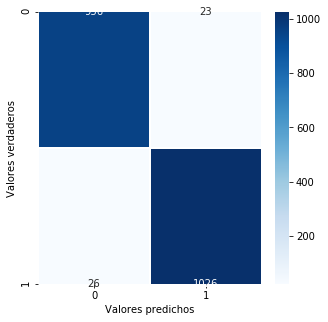

In [77]:
funcs.getConfusionMatrix(y_test, bnb_predicciones)

# Comparando todos los modelos

## Curvas ROC

In [78]:
#definimos un array de diccionarios para recopilar la info de todos los modelos para luego pasarla a la función que plotea
#la curva ROC
rocComparisonDictionary = []

#KNN
rocComparisonDictionary.append({"y_prob": knn_predicciones, "modelLabel": "KNN (K="+ str(knn_grid.best_params_['clasificador__n_neighbors']) +")"})
#regresion logistica
rocComparisonDictionary.append({"y_prob": reg_log_predicciones, "modelLabel": "Reg Logisitica"})
#Bernoulli Naive Bayes
rocComparisonDictionary.append({"y_prob": bnb_predicciones, "modelLabel": "Bernouilli NB"})


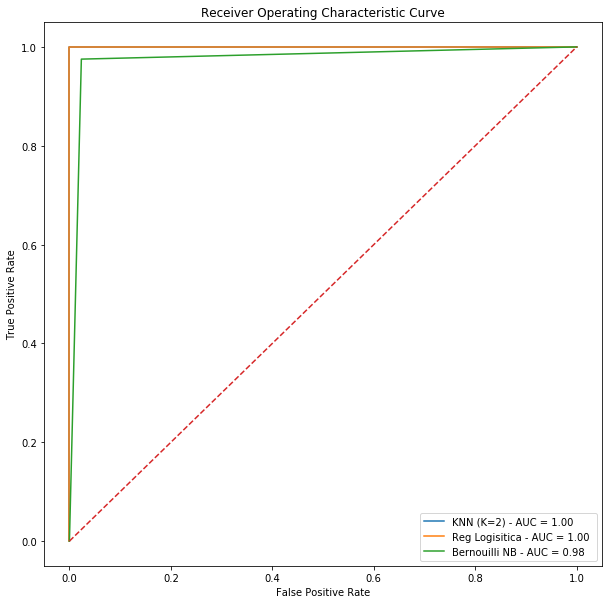

In [79]:
funcs.plotMultipleROC_Curve(y_test, rocComparisonDictionary)

## Análisis de la métrica Precision

##### Dado que para nuestro problema, lo importante es determinar la ingesta de hongos, teniendo en cuenta que un hongo puede comerse si no es venenoso, para el análisis de nuestro modelo debemos tener en cuenta los falsos positivos (FP). Estos casos corresponden a los hongos venenosos (no pueden comerse), pero el modelo los clasificó como comestibles. Lo ideal sería que nuestros modelos minimicen estos casos. Los falsos negativos (FN), corresponden a los hongos marcados por el modelo como no comestibles, siendo que en realidad si pueden comerse; para esta métrica no realizaremos ningún análisis, ya que estos casos no representan ningún peligro si los modelos cometen errores.

##### Para evaluar los modelos usarmos la metrica Precision, ya que penaliza la performance según la cantidad de FP, cuando menor sea el valor de FP, mayor será la Precision

In [80]:
#definimos un  de diccionarios para recopilar la info de todos los modelos 
precisionComparisonDictionary = []

#KNN
precisionComparisonDictionary.append({"precision_score": funcs.getModelPrecision(y_test, knn_predicciones), "model": "KNN (K="+ str(knn_grid.best_params_['clasificador__n_neighbors']) +")"})
#regresion logistica
precisionComparisonDictionary.append({"precision_score": funcs.getModelPrecision(y_test, reg_log_predicciones), "model": "Reg Logisitica"})
#Bernoulli Naive Bayes
precisionComparisonDictionary.append({"precision_score": funcs.getModelPrecision(y_test, bnb_predicciones), "model": "Bernouilli NB"})

#lo pasamos a un dataframe
df_precision = pd.DataFrame(precisionComparisonDictionary)

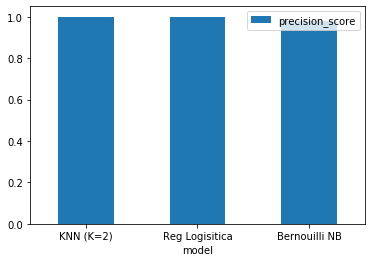

In [81]:
#graficamos los resultados
ax = df_precision.plot.bar(x='model', y='precision_score', rot=0)